## Loading required libraries

In [1]:
import cv2
import urllib
import numpy as np
from os import path

# %matplotlib notebook
# %matplotlib inline
%matplotlib qt
# bugged in win
# %matplotlib tk 
import matplotlib.pyplot as plt


## Utility functions

### Read img from URL  - url2img(url_of_img, mode=-1)

In [2]:
BASE_REPO = r"https://raw.githubusercontent.com/opencv/opencv/master/samples/data"

def url2img(url_of_img, mode=-1):
    with urllib.request.urlopen(url_of_img) as url:
        img_array = np.array(bytearray(url.read()), dtype=np.uint8)
    img = cv2.imdecode(img_array, mode)
    # OpenCV uses BGR format
    # img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    return img

### Show img - show_img(img, time=5000, fname='Frame')

In [3]:
def show_img(img, time=5000, fname='Frame_name', img_name='written_img.jpg'):
    try:
        cv2.imshow(fname, img)
        # for 64-bit system 0xFF
        k = cv2.waitKey(0) & 0xFF
        if k == 27:  # Esc key, close image window
            cv2.destroyAllWindows()
        elif k == ord('s'):  # s to save image, and exit
            cv2.imwrite(img_name, img)
    except Exception:
        print('Something is wrong!')
    finally:
        cv2.destroyAllWindows()

## Image Operations

### Read image from URL

In [4]:
# unchanged image, with alpha layer too, default mode=-1, unchanged
img_path = BASE_REPO + r'/lena.jpg'
lena_unchanged = url2img(img_path)
show_img(lena_unchanged)

In [5]:
# grayscale
lena_gray = url2img(img_path, 0)
show_img(lena_gray)

In [6]:
# BGR format
lena_color = url2img(img_path, 1)
show_img(lena_color)

### Reading/Writing local image

In [7]:
cv2.imwrite('.\data\lena_gray.jpg', lena_gray)

True

In [8]:
show_img(cv2.imread('.\data\lena_gray.jpg'))  ## read and display image

### Drawing Shapes on frames

In [9]:
img = cv2.imread('.\data\lena.jpg')
img = cv2.line(img, (0, 0), (255, 255), color=(255, 0, 0), thickness=2)
img = cv2.arrowedLine(img, (255, 255), (400, 255), color=(0, 0, 0), thickness=3)
img = cv2.rectangle(img, (384, 0), (510, 128), color=(0, 200, 0), thickness=1)
img = cv2.circle(img, (447, 363), 63, color=(0, 200, 0), thickness=-1)
font=cv2.FONT_HERSHEY_SIMPLEX
img = cv2.putText(img, text='OpenCV', org=(10, 500), 
                  fontFace=font, fontScale=4, 
                  color=(200, 200, 200), thickness=2)
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Image Operations

### shape, size, dtype, split, merge

In [10]:
img = cv2.imread('.\data\messi5.jpg')

print(f"img.shape - {img.shape}")  # (row, col, channel)
print(f"img.size - {img.size}")  # total pixels
print(f"img.dtype - {img.dtype}")

b, g, r = cv2.split(img)  # split image channel wise
# img2 = cv2.merge((b, g, r))
img2 = cv2.merge((r, g, b))

cv2.imshow('image', img)
cv2.imshow('image2', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

img.shape - (342, 548, 3)
img.size - 562248
img.dtype - uint8


### copy ROI (region of interest)

In [11]:
img = cv2.imread('.\data\messi5.jpg')

ball = img[280:340, 330:390]  # copy ball 
img[273:333, 100:160] = ball  # paste ball

cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Add 2 images, resize

In [12]:
# https://docs.opencv.org/2.4/modules/core/doc/operations_on_arrays.html
img = cv2.imread('.\data\messi5.jpg')
img2 = cv2.imread('.\data\opencv-logo.png')

img = cv2.resize(img, (512, 512))
img2 = cv2.resize(img2, (512, 512))

new_img = cv2.add(img, img2)
new_img2 = cv2.addWeighted(img, .9, img2, .1, 0)

cv2.imshow('image', new_img)
cv2.imshow('image2', new_img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Bitwise operations

In [13]:
img1 = np.zeros((250, 500, 3), np.uint8)
img1 = cv2.rectangle(img1, (200, 0), (300, 100), (255, 255, 255), -1)
img2 = np.zeros((250, 500, 3), np.uint8)
img2 = cv2.rectangle(img2, (250, 0), (500, 250), (255, 255, 255), -1)

cv2.imshow('image', img1)
cv2.imshow('image2', img2)
cv2.imshow('AND', cv2.bitwise_and(img1, img2))
cv2.imshow('OR', cv2.bitwise_or(img1, img2))
cv2.imshow('XOR', cv2.bitwise_xor(img1, img2))
# cv2.imshow('NOT', cv2.bitwise_and(img1))
cv2.waitKey(0)
cv2.destroyAllWindows()

## Video Operations

### Capturing from webcam/video file

In [14]:
video_file = r".\data\video.webm"
# create capture object
cap = cv2.VideoCapture(video_file)  # 0 index of camera,
# other options : -1, 1, 2, etc.. for multiple devices

print(f"Is Valid cap? - {cap.isOpened()}")

while cap.isOpened():  # if index is wrong or, file doesn't exist, nothing happens
    ret, frame = cap.read()
    # convert to gray
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame_name', frame)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

print(f"frame width - {cap.get(cv2.CAP_PROP_FRAME_WIDTH)}")

cap.release()  # release resources
cv2.destroyAllWindows()


Is Valid cap? - True
frame width - 960.0


### Writing a video file

In [15]:
# capturing a video and saving it
# https://www.fourcc.org/codecs.php
fourcc = cv2.VideoWriter_fourcc(*'XVID')
# cv2.VideoWriter(filename, fourcc, fpd, dims)
out = cv2.VideoWriter('.\data\out.avi', fourcc, 20.0, (640, 480))

cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    out.write(frame)
    cv2.imshow('frame_name', frame)  # colab
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break
        
cap.release()
out.release()
cv2.destroyAllWindows()

### Setting camera params

In [16]:
video_file = r".\data\video.webm"

cap = cv2.VideoCapture(0)

print(f"Is Valid cap? - {cap.isOpened()}")
print(f"frame width - {cap.get(cv2.CAP_PROP_FRAME_WIDTH)}")
print(f"frame height - {cap.get(cv2.CAP_PROP_FRAME_HEIGHT)}")

# every property is associated with some number - 3:width, 4:height
# also it will maintain ratio, and only select from available resolutions
cap.set(3, 200)
cap.set(4, 200)

print(f"frame width - {cap.get(3)}")
print(f"frame height - {cap.get(4)}")

while cap.isOpened():
    ret, frame = cap.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame_name', frame)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break
cap.release()
cv2.destroyAllWindows()


Is Valid cap? - True
frame width - 640.0
frame height - 480.0
frame width - 320.0
frame height - 240.0


### Adding text to frames

In [17]:
from datetime import datetime as dt

cap = cv2.VideoCapture(video_file)
print(f"frame width - {cap.get(cv2.CAP_PROP_FRAME_WIDTH)}")
print(f"frame height - {cap.get(cv2.CAP_PROP_FRAME_HEIGHT)}")

while cap.isOpened():
    ret, frame = cap.read()
    font = cv2.FONT_HERSHEY_SIMPLEX
    text = f"W:{cap.get(3)} H:{cap.get(4)}DT: {dt.now()}"
    frame = cv2.putText(frame, text=text, 
                        org=(10, 50), 
                        fontFace=font, 
                        fontScale=1, 
                        color=(0, 0, 0), 
                        thickness=2,
                        lineType=cv2.LINE_AA)
    cv2.imshow('frame_name', frame)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break
cap.release()
cv2.destroyAllWindows()


frame width - 960.0
frame height - 540.0


## Mouse events

In [18]:
# get a lis tof events
events = [event for event in dir(cv2) if 'EVENT' in event]
events

['EVENT_FLAG_ALTKEY',
 'EVENT_FLAG_CTRLKEY',
 'EVENT_FLAG_LBUTTON',
 'EVENT_FLAG_MBUTTON',
 'EVENT_FLAG_RBUTTON',
 'EVENT_FLAG_SHIFTKEY',
 'EVENT_LBUTTONDBLCLK',
 'EVENT_LBUTTONDOWN',
 'EVENT_LBUTTONUP',
 'EVENT_MBUTTONDBLCLK',
 'EVENT_MBUTTONDOWN',
 'EVENT_MBUTTONUP',
 'EVENT_MOUSEHWHEEL',
 'EVENT_MOUSEMOVE',
 'EVENT_MOUSEWHEEL',
 'EVENT_RBUTTONDBLCLK',
 'EVENT_RBUTTONDOWN',
 'EVENT_RBUTTONUP']

### Mouse click example

In [19]:
# create mouse callback function
def click_event(event, x, y, flags, param):
    # on double left mouse click, show coordinates
    if event == cv2.EVENT_LBUTTONDBLCLK:
        font = cv2.FONT_HERSHEY_SIMPLEX
        text = f"{x}, {y}"
        print(text)
        cv2.putText(img, text=text, org=(x, y), 
                    fontFace=font, fontScale=.5, 
                    color=(255, 255, 0), thickness=2,)
        cv2.imshow('frame_name', img)

img = np.zeros((512, 512, 3), np.uint8)
cv2.imshow('frame_name', img)

cv2.setMouseCallback('frame_name', click_event)

cv2.waitKey(0)
cv2.destroyAllWindows()

137, 124
159, 230


### draw line via mouse

In [20]:
# create mouse callback function
def click_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img, (x, y), radius=3, color=(0, 0, 255), thickness=-1)
        points.append((x, y))
        if len(points) >= 2:
            cv2.line(img, points[-1], points[-2], (255, 0, 0), 5)
        cv2.imshow('frame_name', img)

img = np.zeros((512, 512, 3), np.uint8)
cv2.imshow('frame_name', img)
points = []
cv2.setMouseCallback('frame_name', click_event)

cv2.waitKey(0)
cv2.destroyAllWindows()

## Trackbar

### change color

In [3]:
img = np.zeros((300, 512, 3), np.uint8)

win_name = 'image'
cv2.namedWindow(win_name)  # create named window

# callback function
def do_something(x):
    return x

# cv2.createTrackbar(trackbarName='B', 
#                    windowName='image', # named window name
#                    value=0,  # set value
#                    count=255, # max val
#                    onChange=do_something, # callback function
#                   )
cv2.createTrackbar('B', win_name, 0, 255, do_something)
cv2.createTrackbar('G', win_name, 200, 255, do_something)
cv2.createTrackbar('R', win_name, 0, 255, do_something)
cv2.createTrackbar('s', win_name, 0, 1, do_something)

while True:
    cv2.imshow(win_name, img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    b = cv2.getTrackbarPos('B', win_name)
    g = cv2.getTrackbarPos('G', win_name)
    r = cv2.getTrackbarPos('R', win_name)
    
    
    if cv2.getTrackbarPos('s', win_name):
        img[:] = [b, g, r]

cv2.destroyAllWindows()

### another example

In [4]:
win_name = 'image'
cv2.namedWindow(win_name)

cv2.createTrackbar('num', win_name, 30, 400, do_something)
cv2.createTrackbar('Color/Gray', win_name, 0, 1, do_something)

while True:
    img = cv2.imread('./data/lena.jpg')
    pos = cv2.getTrackbarPos('num', win_name)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img, str(pos), (50, 150), font, 4, (0, 0, 0))
    
    
    k = cv2.waitKey(1) & 0xFF
    if k ==27:
        break
        
    if cv2.getTrackbarPos('Color/Gray', win_name):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2.imshow(win_name, img)

cv2.destroyAllWindows()    

## HSV (hue, saturation, value)

### Object Detection (Image)

In [7]:
# simple
while True:
    frame = cv2.imread('./data/smarties.png')
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    # lower/upper blue color range
    l_b = np.array([110, 50, 50])
    u_b = np.array([130, 255, 255])
    
    # mask
    mask = cv2.inRange(hsv, l_b, u_b)
    
    res = cv2.bitwise_and(frame, frame, mask=mask)
    
    cv2.imshow('frame', frame)
    cv2.imshow('mask', mask)
    cv2.imshow('result', res)

    k = cv2.waitKey(1) & 0xFF
    if k ==27:
        break
    
cv2.destroyAllWindows()    

In [10]:
def something(x):
    pass


cv2.namedWindow('Tracking')
cv2.createTrackbar('LH', 'Tracking', 0, 255, something)  # lower hue
cv2.createTrackbar('UH', 'Tracking', 255, 255, something)  
cv2.createTrackbar('LS', 'Tracking', 0, 255, something)  # lower saturation
cv2.createTrackbar('US', 'Tracking', 255, 255, something)
cv2.createTrackbar('LV', 'Tracking', 0, 255, something)
cv2.createTrackbar('UV', 'Tracking', 255, 255, something)


while True:
    frame = cv2.imread('./data/smarties.png')
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    l_h = cv2.getTrackbarPos('LH', 'Tracking')
    l_s = cv2.getTrackbarPos('LS', 'Tracking')
    l_v = cv2.getTrackbarPos('LV', 'Tracking')
    
    u_h = cv2.getTrackbarPos('UH', 'Tracking')
    u_s = cv2.getTrackbarPos('US', 'Tracking')
    u_v = cv2.getTrackbarPos('UV', 'Tracking')
    
    # lower/upper blue color range
    l_b = np.array([l_h, l_s, l_v])
    u_b = np.array([u_h, u_s, u_v])
    
    # mask
    mask = cv2.inRange(hsv, l_b, u_b)
    
    res = cv2.bitwise_and(frame, frame, mask=mask)
    
    cv2.imshow('frame', frame)
    cv2.imshow('mask', mask)
    cv2.imshow('result', res)

    k = cv2.waitKey(1) & 0xFF
    if k ==27:
        break
    
cv2.destroyAllWindows()    

### Object Detection (Video)

In [3]:
# dummy fnction, required
def something(x):
    pass

video_file = r".\data\video.webm"
cap = cv2.VideoCapture(video_file)

cv2.namedWindow('Tracking')
cv2.createTrackbar('LH', 'Tracking', 0, 255, something)  # lower hue
cv2.createTrackbar('UH', 'Tracking', 255, 255, something)  
cv2.createTrackbar('LS', 'Tracking', 0, 255, something)  # lower saturation
cv2.createTrackbar('US', 'Tracking', 255, 255, something)
cv2.createTrackbar('LV', 'Tracking', 0, 255, something)
cv2.createTrackbar('UV', 'Tracking', 255, 255, something)


while True:
    # frame = cv2.imread('./data/smarties.png')
    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    l_h = cv2.getTrackbarPos('LH', 'Tracking')
    l_s = cv2.getTrackbarPos('LS', 'Tracking')
    l_v = cv2.getTrackbarPos('LV', 'Tracking')
    
    u_h = cv2.getTrackbarPos('UH', 'Tracking')
    u_s = cv2.getTrackbarPos('US', 'Tracking')
    u_v = cv2.getTrackbarPos('UV', 'Tracking')
    
    # lower/upper blue color range
    l_b = np.array([l_h, l_s, l_v])
    u_b = np.array([u_h, u_s, u_v])
    
    # mask
    mask = cv2.inRange(hsv, l_b, u_b)
    
    res = cv2.bitwise_and(frame, frame, mask=mask)
    
    cv2.imshow('frame', frame)
    cv2.imshow('mask', mask)
    cv2.imshow('result', res)

    k = cv2.waitKey(1) & 0xFF
    if k ==27:
        break

cap.release()
cv2.destroyAllWindows()

## Image Thresholding

### Simple Thresholding

In [3]:
img = cv2.imread(r'./data/gradient.png', 0)

_, th1 = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
_, th2 = cv2.threshold(img, 125, 255, cv2.THRESH_BINARY_INV)
_, th3 = cv2.threshold(img, 75, 255, cv2.THRESH_TRUNC)
_, th4 = cv2.threshold(img, 200, 255, cv2.THRESH_TOZERO)

cv2.imshow('image', img)
cv2.imshow('th1', th1)
cv2.imshow('th2', th2)
cv2.imshow('th3', th3)
cv2.imshow('th4', th4)


cv2.waitKey(0)
cv2.destroyAllWindows()

### Adaptive Thresholding

In [8]:
img = cv2.imread(r'./data/sudoku.png', 0)

_, th1 = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
# cv2.adaptiveThreshold(img, max_val, adaptive_method, Threshold_type, blocksize, C)
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

cv2.imshow('image', img)
cv2.imshow('th-binary', th1)
cv2.imshow('th-mean', th2)
cv2.imshow('th-gauss', th3)


cv2.waitKey(0)
cv2.destroyAllWindows()

From now, we are gonna use matplotlib.pyplot for plotting images, wherever possible.

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


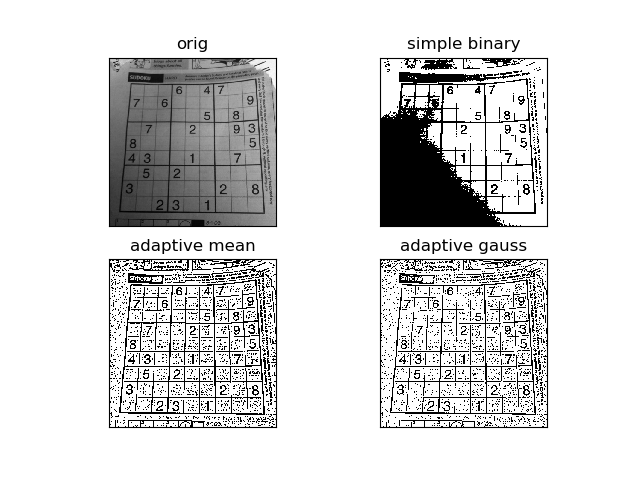

In [20]:
titles = ['orig', 'simple binary', 'adaptive mean', 'adaptive gauss']
images = [img, th1, th2, th3, th2]

for i in range(4):
    plt.subplot(2, 2, i+1) 
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
    
plt.show()

## Morphological Transformations
Simple transformations based on image shape, usually parformed on binary image.

<IPython.core.display.Javascript object>


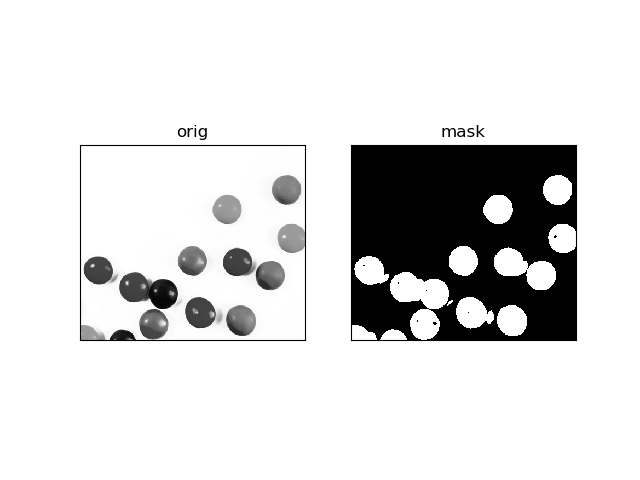

In [4]:
# read image as grayscale
img = cv2.imread(r'./data/smarties.png', cv2.IMREAD_GRAYSCALE)
_, mask = cv2.threshold(img, 220, 255, cv2.THRESH_BINARY_INV)

titles = ['orig', 'mask']
images = [img, mask]

for i in range(2):
    plt.subplot(1, 2, i+1) 
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
    
plt.show()

### Dilation, erosion, open, close, gradient, tophat

<IPython.core.display.Javascript object>


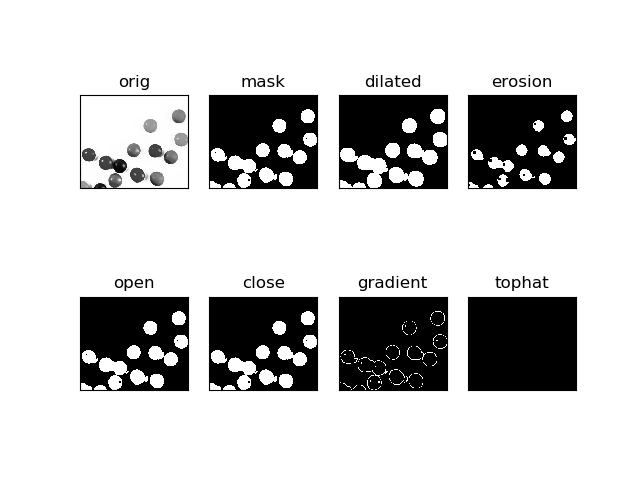

In [19]:
# read image as grayscale
img = cv2.imread(r'./data/smarties.png', cv2.IMREAD_GRAYSCALE)
_, mask = cv2.threshold(img, 220, 255, cv2.THRESH_BINARY_INV)


kernel = np.ones((3, 3), np.uint8)  
dilation = cv2.dilate(mask, kernel=kernel, iterations=2)  # remove dots from previous mask
erosion = cv2.erode(mask, kernel=kernel, iterations=4)  # if all pixels under kernel 1, then 1
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)  # erosion + dilation
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)  # dilation + erosion
morph_grad = cv2.morphologyEx(mask, cv2.MORPH_GRADIENT, kernel)  # difference bw dilation and erosion
morph_tophat = cv2.morphologyEx(mask, cv2.MORPH_TOPHAT, kernel)  # difference bw image and open image

titles = ['orig', 'mask', 'dilated', 'erosion', 'open', 'close', 'gradient', 'tophat']
images = [img, mask, dilation, erosion, opening, closing, morph_grad, morph_tophat]

for i in range(8):
    plt.subplot(2, 4, i+1) 
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
    
plt.show()

## Smoothing and Blurring

### 2D filter, averaging, gaussian blur

<IPython.core.display.Javascript object>


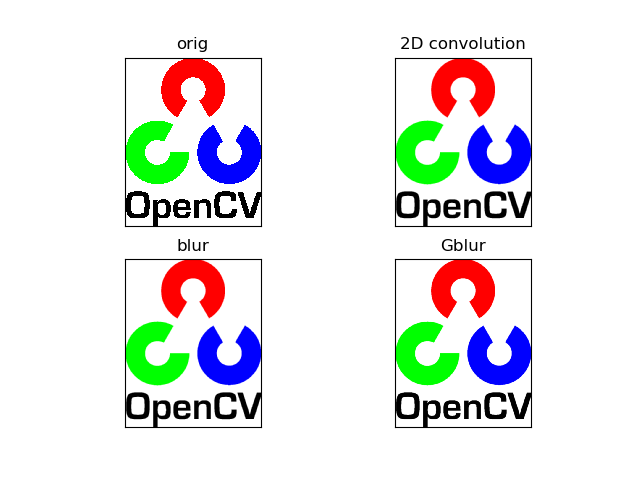

In [29]:
img = cv2.imread(r'./data/opencv-logo.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

kernel = np.ones((5, 5), np.float32) / 25  # divide by width*height  
# dst = cv2.filter2D(img, desired_depth, kernel)
dst = cv2.filter2D(img, -1, kernel)
blur = cv2.blur(img, (5, 5))  # weigthed avg with equal weights
gblur = cv2.GaussianBlur(img, (5, 5), sigmaX=0)  # weighted avg with high middle weights


titles = ['orig', '2D convolution', 'blur', 'Gblur']
images = [img, dst, blur, gblur]

for i in range(4):
    plt.subplot(2, 2, i+1) 
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
    
plt.show()

### Median Blur

In [3]:
img = cv2.imread(r'./data/Noise_salt_and_pepper.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

kernel = np.ones((5, 5), np.float32) / 25  # divide by width*height  
# dst = cv2.filter2D(img, desired_depth, kernel)
dst = cv2.filter2D(img, -1, kernel)
blur = cv2.blur(img, (5, 5))  # weigthed avg with equal weights
gblur = cv2.GaussianBlur(img, (5, 5), sigmaX=0)  # weighted avg with high middle weights
median = cv2.medianBlur(img, ksize=5)  # best for removing salt and pepper noise


titles = ['orig', '2D convolution', 'blur', 'Gblur', 'median blur']
images = [img, dst, blur, gblur, median]

for i in range(5):
    plt.subplot(2, 3, i+1) 
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
    
plt.show()

## Image Gradient
Directional change in the intensity or color of an image.

### Laplaican, sobelX, sobelY

In [7]:
# read image as grayscale
img = cv2.imread(r'./data/messi5.jpg', cv2.IMREAD_GRAYSCALE)
# cv2.Laplacian(img, dtype)
lap = cv2.Laplacian(img, cv2.CV_64F, ksize=3)  # cv_64F to deal with -ve gradient
lap = np.uint8(np.absolute(lap))  # convert to uint for showing

# cv2.Sobel(img, dtype, dx, dy)
sobelX = np.uint8(np.absolute(cv2.Sobel(img, cv2.CV_64F, 1, 0)))
sobelY = np.uint8(np.absolute(cv2.Sobel(img, cv2.CV_64F, 0, 1)))

titles = ['orig', 'laplacian', 'SobelX', 'SobelY']
images = [img, lap, sobelX, sobelY]

for i in range(4):
    plt.subplot(2, 2, i+1) 
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [13]:
# read image as grayscale
img = cv2.imread(r'./data/sudoku.png', cv2.IMREAD_GRAYSCALE)

# cv2.Sobel(img, dtype, dx, dy)
sobelX = np.uint8(np.absolute(cv2.Sobel(img, cv2.CV_64F, 1, 0)))
sobelY = np.uint8(np.absolute(cv2.Sobel(img, cv2.CV_64F, 0, 1)))

sobelCombined = cv2.bitwise_or(sobelX, sobelY) 

titles = ['orig', 'SobelX', 'SobelY', 'Scombined']
images = [img, sobelX, sobelY, sobelCombined]

for i in range(4):
    plt.subplot(2, 2, i+1) 
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
    
plt.show()

## Canny Edge Detection

Steps - 
1. Noise Reduction
2. Gradient Calc
3. Non-maximum supression
4. Double Threshold
5. Edge tracking by Hystresis

In [20]:
# read image as grayscale
img = cv2.imread(r'./data/lena.jpg', cv2.IMREAD_GRAYSCALE)
canny = cv2.Canny(img, threshold1=100, threshold2=200)

titles = ['orig', 'canny']
images = [img, canny]

for i in range(2):
    plt.subplot(1, 2, i+1) 
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [22]:
# Comaparison with other edge detection methods
img = cv2.imread(r'./data/messi5.jpg', cv2.IMREAD_GRAYSCALE)

lap = np.uint8(np.absolute(cv2.Laplacian(img, cv2.CV_64F, ksize=3)))
sobelX = np.uint8(np.absolute(cv2.Sobel(img, cv2.CV_64F, 1, 0)))
sobelY = np.uint8(np.absolute(cv2.Sobel(img, cv2.CV_64F, 0, 1)))
sobelCombined = cv2.bitwise_or(sobelX, sobelY)
canny = cv2.Canny(img, threshold1=100, threshold2=200)

titles = ['orig', 'laplacian', 'SobelX', 'SobelY', 'sobelCombined', 'canny']
images = [img, lap, sobelX, sobelY, sobelCombined, canny]

for i in range(6):
    plt.subplot(2, 3, i+1) 
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
    
plt.show()

## Image Pyramids
used for blending and reconstructing images.

### Gaussian Pyramid

In [25]:
img = cv2.imread(r"./data/lena.jpg")
pyrd1 = cv2.pyrDown(img)
pyrd2 = cv2.pyrDown(pyrd1)

pyru1 = cv2.pyrUp(pyrd2)

cv2.imshow('Image', img)
cv2.imshow('PyrD 1', pyrd1)
cv2.imshow('PyrD 2', pyrd2)
cv2.imshow('PyrU 1', pyru1)

cv2.waitKey(0)
cv2.destroyAllWindows()

### Laplacian Pyramid
Unfortunately, no explicit function for Laplacian Pyramid, but we can get it by computing the difference bw that level in gaussian pyramid and expanded version of its upper level in Gaussian pyramid.

In [27]:
img = cv2.imread(r"./data/lena.jpg")

layer = img.copy()
gaussian_pyramid = [layer]

# gaussian pyramid
for i in range(4):
    layer = cv2.pyrDown(layer)
    gaussian_pyramid.append(layer)
    
layer = gaussian_pyramid[-1]

# laplacian pyramid
laplacian_pyramid = [layer]
for i in range(3, 0, -1):
    gaussian_extended = cv2.pyrUp(gaussian_pyramid[i])
    laplacian = cv2.subtract(gaussian_pyramid[i-1], gaussian_extended)
    laplacian_pyramid.append(laplacian)
    cv2.imshow(str(i), laplacian)
    
cv2.waitKey(0)
cv2.destroyAllWindows()

## Blending and Reconstructing Images

In [75]:
apple = cv2.imread(r'./data/apple.jpg')
orange = cv2.imread(r'./data/orange.jpg')

print(f"apple.shape = {apple.shape}")
print(f"orange.shape = {orange.shape}")

apple.shape = (512, 512, 3)
orange.shape = (512, 512, 3)


In [96]:
apple_orange = np.hstack((apple[:, :256, :], orange[:, 256:, :]))

cv2.imshow('apple_orange', apple_orange)

cv2.waitKey(0)
cv2.destroyAllWindows()

### Blending

Steps- 
1. Load images
2. Find gaussian pyr for images
3. Find laplacian pyr
4. Join left and right half of both images in level of lap pyr
5. From this lap pyr, reconstruct orig img


In [77]:
pyr_height = 4

In [91]:
# generate gaussian pyramid
apple_layer = apple.copy()
gauss_pyr_apple = [apple_layer]

orange_layer = orange.copy()
gauss_pyr_orange = [orange_layer]

for i in range(pyr_height):
    apple_layer = cv2.pyrDown(apple_layer)
    gauss_pyr_apple.append(apple_layer)
    
    orange_layer = cv2.pyrDown(orange_layer)
    gauss_pyr_orange.append(orange_layer)

In [92]:
# generate laplacian pyramid
apple_layer = gauss_pyr_apple[pyr_height-1]
lap_pyr_apple = [apple_layer]

orange_layer = gauss_pyr_orange[pyr_height-1]
lap_pyr_orange = [orange_layer]

for i in range(pyr_height - 1, 0, -1):
    gaussian_extended_apple = cv2.pyrUp(gauss_pyr_apple[i])
    lap_apple = cv2.subtract(gauss_pyr_apple[i-1], gaussian_extended_apple)
    lap_pyr_apple.append(lap_apple)
    
    gaussian_extended_orange = cv2.pyrUp(gauss_pyr_orange[i])
    lap_orange = cv2.subtract(gauss_pyr_orange[i-1], gaussian_extended_orange)
    lap_pyr_orange.append(lap_orange)


In [94]:
# join at each level
apple_orange_pyr = []
n = 0
for apple_lap, orange_lap in zip(lap_pyr_apple, lap_pyr_orange):
    n += 1
    cols, rows, channels = apple_lap.shape
    laplacian = np.hstack((apple_lap[:, :cols//2], orange_lap[:, cols//2:]))
    apple_orange_pyr.append(laplacian)

In [95]:
# reconstruct image
apple_orange_reconstruct = apple_orange_pyr[0]
for i in range(1, pyr_height):
    apple_orange_reconstruct = cv2.pyrUp(apple_orange_reconstruct)
    # print(apple_orange_pyr[i].shape, apple_orange_reconstruct.shape)
    apple_orange_reconstruct = cv2.add(apple_orange_pyr[i], apple_orange_reconstruct)

(128, 128, 3) (128, 128, 3)
(256, 256, 3) (256, 256, 3)
(512, 512, 3) (512, 512, 3)


In [97]:
cv2.imshow('apple_orange', apple_orange)
cv2.imshow('apple_orange_reconstruct', apple_orange_reconstruct)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Contours detection
curve joining all continuous points along the boundary, having same color or intensity.

In [11]:
img = cv2.imread(r"./data/opencv-logo.png")

# converting to gray coz its easy to find contour in gray
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(src=imgray, thresh=127, maxval=255, type=0)
contours, heirarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
# contours is the python list of all the contours in image.
# each individual contour is np.array of (x, y) coords of boundary points of obj
print(f"# contours = {len(contours)}")

cv2.drawContours(image=img, contours=contours, 
                 contourIdx=-1, # -1: all contours, or indexed till len(contours)
                 color=(0, 255, 0), thickness=3)

titles = ['img',]
images = [img,]

for i in range(1):
    plt.subplot(1, 1, i+1) 
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
    
plt.show()

# cv2.imshow('img', img)
# cv2.imshow('img gray', imgray)
# # cv2.imshow('img', img)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

# contours = 9


## Basic Motion detection

In [14]:
cap = cv2.VideoCapture(r"./data/vtest.avi")

ret, frame1 = cap.read()
ret, frame2 = cap.read()

while cap.isOpened():
    diff = cv2.absdiff(frame1, frame2)
    gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    _, thresh = cv2.threshold(blur, 20, 255, cv2.THRESH_BINARY)
    dilated = cv2.dilate(thresh, kernel=None, iterations=3)
    contours, _ = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    
    cv2.drawContours(frame1, contours, -1, (0, 255, 0), 2)
    
    cv2.imshow('inter', frame1)
    frame1 = frame2
    ret, frame2 = cap.read()
    
    if cv2.waitKey(40) == 27:
        break
        
cap.release()
cv2.destroyAllWindows()

In [44]:
cap = cv2.VideoCapture(r"./data/vtest.avi")

ret, frame1 = cap.read()
ret, frame2 = cap.read()

while cap.isOpened():
    movement = 0
    # get difference bw frames
    diff = cv2.absdiff(frame1, frame2)
    # convert img to gray
    gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
    # blur image
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    # drop every pixel below 20 intensity
    _, thresh = cv2.threshold(blur, 20, 255, cv2.THRESH_BINARY)
    # dialate image to expand borders
    dilated = cv2.dilate(thresh, kernel=None, iterations=3)
    # find contours
    contours, _ = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    
    for contour in contours:
        (x, y, width, height) = cv2.boundingRect(contour)
        # check area, if it is less than a certain value, do nothing
        if cv2.contourArea(contour) >= 1000:
            movement = 1
            cv2.rectangle(frame1, (x, y), (x+width, y+height), (0, 255, 0), 2)
        cv2.putText(img=frame1, text=f"Movement: {movement}", org=(10, 30), 
                    fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=.5, color=(0, 0, 255), 
                    thickness=2)
    
    # check every frame to get better understanding
    cv2.imshow('inter', frame1)
#     cv2.imshow('diff', diff)
#     cv2.imshow('blur', blur)
#     cv2.imshow('thresh', thresh)
#     cv2.imshow('dilated', dilated)

    
    frame1 = frame2
    ret, frame2 = cap.read()
    
    if cv2.waitKey(40) == 27:
        break
        
cap.release()
cv2.destroyAllWindows()

## Detecting Geometrical Shapes

In [66]:
img = cv2.imread(r"./data/shapes.png")
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_, thresh = cv2.threshold(imgray, 240, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# can add more shapes
shapes_dict = {
    3:'triangle',
    4:'rect/square', 
    5:'pentagon',
    10:'star',
}

for contour in contours:
    # approxPolyDP - approximates a polygonal curve with specified precision
    # arcLength - calculates curve length
    approx = cv2.approxPolyDP(curve=contour, 
                              epsilon=0.01*cv2.arcLength(curve=contour, closed=True), 
                              closed=True)
    cv2.drawContours(img, contours=[approx], contourIdx=0, color=(0, 0, 0), thickness=5)
    # find coords to print shape name
    x, y, *drops = approx.ravel()
    
    shape = shapes_dict.get(len(approx), 'undefined polygon')
    cv2.putText(img, 
                text=shape, 
                org=(x, y - 10), # little offset to y for better visibility
                fontFace=cv2.FONT_HERSHEY_COMPLEX,
                fontScale=.5,
                thickness=2, 
                color=(0, 0, 0))

cv2.imshow('inter', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Image Histograms

### Image hist of complete image

In [11]:
img = cv2.imread(r"./data/lena.jpg", 0)

plt.hist(x=img.ravel(), bins=256, range=[0, 256])
plt.show()

cv2.imshow('lena', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
print(f"img.shape = {img.shape}")
print(f"img.ravel = {img.ravel()}")
print(f"len(img.ravel) = {len(img.ravel())}")
print(f"total pixel in img = {512*512}")

img.shape = (512, 512)
img.ravel = [163 162 161 ... 102 106 109]
len(img.ravel) = 262144
total pixel in img = 262144


### image hist channel wise

In [15]:
img = cv2.imread(r"./data/lena.jpg", -1)

b, g, r = cv2.split(img)
channels = [b, g, r]
channel_name = ['Blue', 'Green', 'Red']

for c_name, channel in zip(channel_name, channels):
    cv2.imshow(c_name, channel)
    plt.hist(x=channel.ravel(), bins=256, range=[0, 256], label=c_name, color=c_name)

plt.legend()
plt.show()
cv2.imshow('lena', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Template Matching
Finding the location of template image in larger image
* [Examples](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_template_matching/py_template_matching.html)
* [Template matching functions](https://docs.opencv.org/master/df/dfb/group__imgproc__object.html#ga3a7850640f1fe1f58fe91a2d7583695d)

In [28]:
messi = cv2.imread(r"./data/messi5.jpg")
face = cv2.imread(r"./data/messi_face.jpg")

messi_gray = cv2.cvtColor(messi, cv2.COLOR_BGR2GRAY)
face_gray = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)

# match template in image
result = cv2.matchTemplate(image=messi_gray, templ=face_gray, method=cv2.TM_CCOEFF_NORMED)
cv2.imshow('result', result)

# find brightest point in result via threshold
threshold = 0.9
location = np.where(result >= threshold)
print(location)

# draw shape around brightest point
height, width = face_gray.shape
for pt in zip(*location):
    cv2.rectangle(messi, pt[::-1], (pt[1] + width, pt[0] + height), (0, 0, 255), 1)


cv2.imshow('messi', messi)

cv2.waitKey(0)
cv2.destroyAllWindows()

(array([85], dtype=int64), array([220], dtype=int64))


## Hough Transformation
It is used to detect any shape. If we can represent that shape in mathematical form, it can be detected even if it is broken or distorted.

***Algorithm***
1. Edge Detection
2. Mapping edge points to Hough space and store them in accumulator
3. Interpretation of accumulator to yield lines of infinite length
4. Conversion of infinite lines to finite lines

### line detection
* [Explanation](https://www.youtube.com/watch?v=7m-RVJ6ABsY&list=PLS1QulWo1RIa7D1O6skqDQ-JZ1GGHKK-K&index=32)

#### Standard Hough Line Transform

In [56]:
img = cv2.imread(r"./data/sudoku.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
lines = cv2.HoughLines(image=edges, rho=1, theta=np.pi/180, threshold=200)

In [57]:
print(f"lines.shape = {lines.shape}")
print(f"lines[0] = {lines[0]}")

cv2.imshow('messi', edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

lines.shape = (29, 1, 2)
lines[0] = [[361.          1.5707964]]


In [58]:
for line in lines:
    rho, theta = line[0]
    a, b = np.cos(theta), np.sin(theta)
    x0, y0 = a * rho, b * rho
    x1, y1 = int(x0 + 1000 * (-b)), int(y0 + 1000 * a)
    x2, y2 = int(x0 - 1000 * (-b)), int(y0 - 1000 * a)
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

cv2.imshow("img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Probabilistic Hough Line Transform

In [61]:
img = cv2.imread(r"./data/sudoku.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
lines = cv2.HoughLinesP(image=edges, rho=1, theta=np.pi/180, threshold=100, 
                       minLineLength=100, maxLineGap=10, )

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (200, 200, 255), 2)

cv2.imshow("img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Road Lane Detection

#### On Image

In [18]:
image = cv2.imread(r"./data/road.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

img_height, img_width, *_ = image.shape

plt.imshow(image)
plt.show()

In [29]:
# define ROI region of Interest
region_of_interest_vertices = [
    (0, img_height),
    (img_width/2, img_height/2),
    (img_width, img_height)
]

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

# draw_lines
def draw_lines(img, lines):
    blank_image = np.zeros(img.shape, dtype=np.uint8)
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(blank_image, (x1, y1), (x2, y2), (0, 255, 0), 5)
    merged_image = cv2.addWeighted(img, 0.8, blank_image, 1, 0)
    return merged_image
            

In [25]:
# edge detection
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
canny_image = cv2.Canny(gray_image, 10, 200)
cropped_image = region_of_interest(canny_image, 
                                   np.array([region_of_interest_vertices], np.int32))

plt.imshow(cropped_image)
plt.show()

In [30]:
# draw complete lines using Hough Transform
lines = cv2.HoughLinesP(cropped_image, 
                        rho=6, 
                        theta=np.pi/60, 
                        threshold=160, 
                        lines=np.array([]), 
                        minLineLength=40, 
                        maxLineGap=25)
image_with_lines = draw_lines(image, lines)
plt.imshow(image_with_lines)
plt.show()

#### On Video

In [31]:
def process_img(image):
    img_height, img_width, *_ = image.shape
    region_of_interest_vertices = [
        (0, img_height),
        (img_width/2, img_height/2),
        (img_width, img_height)
    ]
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    canny_image = cv2.Canny(gray_image, 10, 200)
    cropped_image = region_of_interest(canny_image, 
                                       np.array([region_of_interest_vertices], np.int32))
    lines = cv2.HoughLinesP(cropped_image, 
                            rho=6, 
                            theta=np.pi/60, 
                            threshold=160, 
                            lines=np.array([]), 
                            minLineLength=40, 
                            maxLineGap=25)
    image_with_lines = draw_lines(image, lines)
    return image_with_lines   

In [35]:
cap = cv2.VideoCapture(r"./data/lane_detection.mp4")

while cap.isOpened():
    _, frame = cap.read()
    
    if frame is None:
        print('Video completed')
        break
    frame = process_img(frame)
    cv2.imshow('video', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Video completed


### Circle Detection
* [Explanation](https://www.youtube.com/watch?v=dp1r9oT_h9k&list=PLS1QulWo1RIa7D1O6skqDQ-JZ1GGHKK-K&index=38) 

In [16]:
img = cv2.imread(r"./data/smarties.png")

imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imgray = cv2.medianBlur(imgray, ksize=5)
circles = cv2.HoughCircles(imgray, method=cv2.HOUGH_GRADIENT, dp=1, 
                           minDist=20, param1=50, param2=30, minRadius=0, maxRadius=0)
detected_circles = np.uint16(np.around(circles))

for x, y, r in np.squeeze(detected_circles):
    # draw circle
    cv2.circle(img, (x, y), r, (3, 6, 51), 2)
    # draw center
    cv2.circle(img, (x, y), 2, (0, 255, 255), 2)

cv2.imshow('img', img)


cv2.waitKey(0)
cv2.destroyAllWindows()

## Face Detection using Haar Classifier
* [Explanation](https://www.youtube.com/watch?v=LopYA64KmdE&list=PLS1QulWo1RIa7D1O6skqDQ-JZ1GGHKK-K&index=39)

### Image

In [6]:
face_cascade = cv2.CascadeClassifier(r"./data/haarcascade_frontalface_default.xml")

img = cv2.imread("./data/messi5.jpg")
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(imgray, scaleFactor=1.1, minNeighbors=4)

for x, y, w, h in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 255), 2)

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Video

In [19]:
cap = cv2.VideoCapture(r"./data/Megamind.avi")

while cap.isOpened():
    _, frame = cap.read()
    
    if frame is None:
        print('Video completed')
        break
    
    imgray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(imgray, scaleFactor=1.1, minNeighbors=4)

    for x, y, w, h in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 255), 2)


    cv2.imshow('video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

## Eye Detection using Haar Classifier

### Image

In [22]:
face_cascade = cv2.CascadeClassifier(r"./data/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(r"./data/haarcascade_eye_tree_eyeglasses.xml")

img = cv2.imread("./data/lena.jpg")
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(imgray, scaleFactor=1.1, minNeighbors=4)

for x, y, w, h in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    roi_gray = imgray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for ex, ey, ew, eh in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 255), 2)
    

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Video

In [26]:
cap = cv2.VideoCapture(r"./data/Megamind.avi")

while cap.isOpened():
    _, frame = cap.read()
    
    if frame is None:
        print('Video completed')
        break
    
    imgray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(imgray, scaleFactor=1.1, minNeighbors=4)

    for x, y, w, h in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi_gray = imgray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for ex, ey, ew, eh in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 255), 2)

    cv2.imshow('video', frame)
    # cv2.imshow('roi', roi_color)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()